# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url).json()
btc_current_price = btc_current_price["data"]["1"]["quotes"]["CAD"]["price"]
print(f"The current price for BTC is ${btc_current_price:0.2f}")

# Fetch current ETH price
eth_current_price = requests.get(eth_url).json()
eth_current_price = eth_current_price["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"The current price for ETH is ${eth_current_price:0.2F}")

The current price for BTC is $48888.66
The current price for ETH is $3093.55


In [7]:
# Compute current value of my crpto
my_btc_value = btc_current_price * my_btc
my_eth_value = eth_current_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58666.39
The current value of your 5.3 ETH is $16395.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-06-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000
).df

# Preview DataFrame
ticker_data.sort_index()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.640   2457876   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.490   2201175   
...                           ...       ...       ...      ...       ...   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050   3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970   2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995   5842592   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-06-26 00:00:00-04:00  243.89  244.380  243.045  243.27  43153677  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355  
2017-06-29 00:00:00-04:00  243.66  243.720  239.955  241.39  87799860  
2017-06-30 00:00:00-04:00  242.26  242.710  241.575  241.77  50347309  
...                           ...      ...      ...     ...       ...  
2021-06-09 00:00:00-04:00  423.18  423.260  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.290  423.100  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.460  423.540  424.50  42885806  

[1000 rows x 10 columns]

In [11]:
# Pick AGG aisnull close prices
ticker_data.drop(columns=["open","high","low","volume"], level=1)

,AGG,SPY
,close,close
time,,
2017-06-26 00:00:00-04:00,110.160,243.27
2017-06-27 00:00:00-04:00,109.830,241.36
2017-06-28 00:00:00-04:00,109.850,243.46
2017-06-29 00:00:00-04:00,109.640,241.39
2017-06-30 00:00:00-04:00,109.490,241.77
...,...,...
2021-06-09 00:00:00-04:00,115.050,421.62
2021-06-10 00:00:00-04:00,115.300,423.58


In [12]:
agg_close_price = ticker_data["AGG"]["close"][-1]
spy_close_price = ticker_data["SPY"]["close"][-1]

In [15]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.995
Current SPY closing price: $424.5


In [16]:
# Compute the current value of share
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of your 200 AGG shares is $22999.00
The current value of your 50 SPY shares is $21225.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], columns=["amount"],index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,75062.214901
shares,44224.000000


<AxesSubplot:title={'center':'Savings Pie Chart'}, ylabel='amount'>

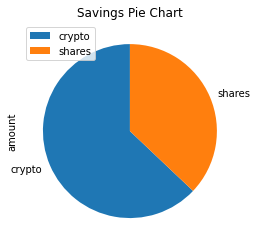

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Pie Chart", startangle=90)

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money for the emergency fund. In total, you have ${total_savings: 0.2f} in hand.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You just reach your goal to save an emergency fund of ${total_savings: 0.2f}.")
elif total_savings < emergency_fund:
    print(f"To reach your goal, you still need to save ${emergency_fund - total_savings: 0.2f}.")


Congratulations! You have enough money for the emergency fund. In total, you have $ 119286.21 in hand.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
start_date_1 = pd.Timestamp('2016-06-14', tz='America/New_York').isoformat()
end_date_1 = pd.Timestamp('2018-06-14', tz='America/New_York').isoformat()

start_date_2 = pd.Timestamp('2018-06-14', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2021-06-14', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# Part 1: Retrieve data from 2016-06-14 to 2018-06-13
df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date_1,
    end=end_date_1,
    limit=1000
).df

# Display sample data
df_stock_data_1.sort_index()

AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2016-06-14 00:00:00-04:00  111.68  111.7300  111.550  111.5550  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.640  111.8000  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.780  111.8600  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.660  111.7700  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.450  111.4600  1877171   
...                           ...       ...      ...       ...      ...   
2018-06-08 00:00:00-04:00  105.75  105.9000  105.740  105.7500  3163343   
2018-06-11 00:00:00-04:00  105.65  105.6900  105.570  105.6500  3219156   
2018-06-12 00:00:00-04:00  105.56  105.6900  105.560  105.6600  2580698   
2018-06-13 00:00:00-04:00  105.69  105.7500  105.380  105.5625  2630489   
2018-06-14 00:00:00-04:00  105.75  105.8600  105.691  105.8400  4404107   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.080  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.750   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.420  111547742  
2016-06-17 00:00:00-04:00  207.17  207.20  205.7500  206.580   86657818  
2016-06-20 00:00:00-04:00  208.82  209.61  207.7500  207.860   67866194  
...                           ...     ...       ...      ...        ...  
2018-06-08 00:00:00-04:00  276.85  278.25  276.6600  278.200   43749957  
2018-06-11 00:00:00-04:00  278.44  279.37  278.3100  278.565   36491787  
2018-06-12 00:00:00-04:00  279.03  279.33  278.1900  278.980   46181857  
2018-06-13 00:00:00-04:00  279.17  279.48  277.8000  277.920   50645314  
2018-06-14 00:00:00-04:00  279.01  279.33  278.0599  278.720   44782863  

[505 rows x 10 columns]

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# Part 2: Retrieve data from 2018-06-14 to 2021-06-14
df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date_2,
    end=end_date_2,
    limit=1000
).df

# Display sample data
df_stock_data_2.sort_index()

AGG                                        \
                             open     high       low     close   volume   
time                                                                      
2018-06-14 00:00:00-04:00  105.75  105.860  105.6910  105.8400  4404107   
2018-06-15 00:00:00-04:00  106.01  106.089  105.8600  105.8800  2149105   
2018-06-18 00:00:00-04:00  105.93  105.930  105.8000  105.8835  2088016   
2018-06-19 00:00:00-04:00  106.05  106.110  105.9800  106.0200  1962499   
2018-06-20 00:00:00-04:00  106.06  106.060  105.7900  105.8050  2201454   
...                           ...      ...       ...       ...      ...   
2021-06-08 00:00:00-04:00  114.84  114.870  114.7800  114.8200  3951702   
2021-06-09 00:00:00-04:00  115.43  115.430  114.9700  115.0500  3418086   
2021-06-10 00:00:00-04:00  115.30  115.310  114.8605  115.3000  3665934   
2021-06-11 00:00:00-04:00  115.31  115.320  115.1600  115.2400  3476373   
2021-06-14 00:00:00-04:00  115.18  115.180  114.9350  114.9700  2999623   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2018-06-14 00:00:00-04:00  279.01  279.33  278.0599  278.72  44782863  
2018-06-15 00:00:00-04:00  276.60  277.51  275.3500  277.20  59526413  
2018-06-18 00:00:00-04:00  275.49  276.70  274.9500  276.57  37265631  
2018-06-19 00:00:00-04:00  274.00  275.75  273.5300  275.51  60173577  
2018-06-20 00:00:00-04:00  276.27  276.72  275.5900  275.98  35048095  
...                           ...     ...       ...     ...       ...  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29  33128340  

[755 rows x 10 columns]

In [25]:
# Combine two datasets
df_stock_data = pd.concat([df_stock_data_1, df_stock_data_2], axis="rows", join="inner")
df_stock_data.sort_index()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.7800  111.860  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.6600  111.770  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.4500  111.460  1877171   
...                           ...       ...       ...      ...      ...   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.42  111547742  
2016-06-17 00:00:00-04:00  207.17  207.20  205.7500  206.58   86657818  
2016-06-20 00:00:00-04:00  208.82  209.61  207.7500  207.86   67866194  
...                           ...     ...       ...     ...        ...  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27   40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62   38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58   43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31   37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29   33128340  

[1260 rows x 10 columns]

In [26]:
# Checking data
# Check Na
df_stock_data = df_stock_data.dropna()
df_stock_data.isnull().sum()

AGG  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [27]:
# Check duplicates
df_stock_data = df_stock_data.drop_duplicates()
df_stock_data.duplicated().sum()

0

In [34]:
# Review the combined data
df_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.7800  111.860  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.6600  111.770  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.4500  111.460  1877171   
...                           ...       ...       ...      ...      ...   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.42  111547742  
2016-06-17 00:00:00-04:00  207.17  207.20  205.7500  206.58   86657818  
2016-06-20 00:00:00-04:00  208.82  209.61  207.7500  207.86   67866194  
...                           ...     ...       ...     ...        ...  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27   40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62   38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58   43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31   37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29   33128340  

[1259 rows x 10 columns]

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

In [36]:
# Printing the simulation of 500 runs and 30 years to represent the 60% stocks (SPY) and 40% bonds (AGG) composition of the portfolio
mcs_retire30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

mcs_retire30.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.66  111.770  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.45  111.460  1877171   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2016-06-14 00:00:00-04:00          NaN  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
2016-06-16 00:00:00-04:00     0.000537  206.73  208.57  205.5900  208.42   
2016-06-17 00:00:00-04:00    -0.000805  207.17  207.20  205.7500  206.58   
2016-06-20 00:00:00-04:00    -0.002774  208.82  209.61  207.7500  207.86   

                                                   
                              volume daily_return  
time                                               
2016-06-14 00:00:00-04:00  102129228          NaN  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
2016-06-16 00:00:00-04:00  111547742     0.003225  
2016-06-17 00:00:00-04:00   86657818    -0.008828  
2016-06-20 00:00:00-04:00   67866194     0.006196

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mcs_retire30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002164,1.003187,1.003497,1.006598,0.994961,0.998837,1.004719,0.986716,1.015117,0.991315,...,0.999037,1.000799,1.006269,0.994173,0.994712,0.994939,0.997738,1.010223,1.000704,1.009475
2,1.008678,1.006776,1.012255,0.994997,0.988663,1.005393,0.997612,0.981817,1.017276,0.997913,...,0.999119,0.999372,1.009367,0.997917,1.001385,0.998780,1.002106,1.002289,1.008339,1.020413
3,1.008327,1.005941,0.999810,0.999189,0.995745,1.011540,0.998100,0.977697,1.008466,1.008118,...,1.014175,1.010470,1.006198,1.009385,0.992062,1.007169,1.005757,1.015703,1.003770,1.025953
4,1.012821,0.996534,1.006761,1.000462,1.003624,1.017965,0.993987,0.982251,1.014590,0.992822,...,1.017588,0.999754,1.013838,1.007431,0.993083,0.995576,1.020190,1.022977,1.009611,1.030131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.390672,29.740802,41.739315,16.129756,88.313426,12.076328,11.658130,19.790704,44.291380,21.624415,...,7.522063,9.217125,8.805028,8.588360,9.508793,15.532354,7.404292,10.168345,40.380344,32.138295
7557,31.024904,29.545481,41.868881,16.081027,87.772507,12.190594,11.741657,19.972010,44.639822,21.652644,...,7.693516,9.321525,8.783877,8.601409,9.418576,15.583409,7.392334,10.154127,40.295221,32.311580
7558,31.019378,29.702808,41.479582,16.099396,87.673845,12.225948,11.862792,19.917675,44.594128,21.899977,...,7.674505,9.350596,8.696967,8.530317,9.598205,15.572431,7.363794,10.122425,40.370074,32.285642
7559,31.053873,29.634703,41.367334,16.421948,88.161832,12.278062,11.849829,19.854061,44.891226,22.167936,...,7.677697,9.269399,8.724825,8.495004,9.547806,15.511705,7.335435,10.111496,40.427404,32.591597


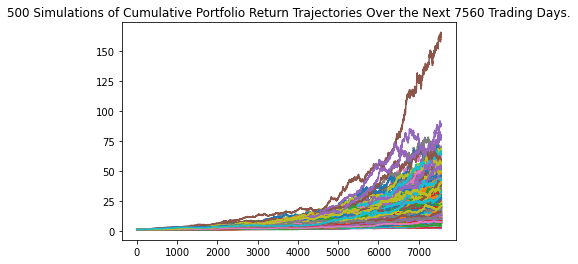

In [38]:
# Plot simulation outcomes
line_plot_retire30= mcs_retire30.plot_simulation()

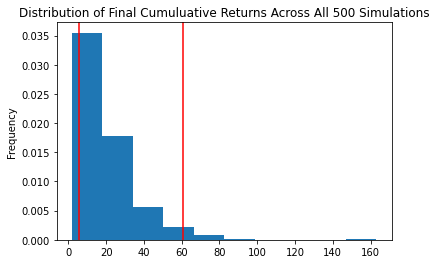

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_retire30 = mcs_retire30.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_retire30 = mcs_retire30.summarize_cumulative_return()

# Print summary statistics
print(tbl_retire30)

count           500.000000
mean             20.334990
std              15.278309
min               1.867790
25%              10.354985
50%              15.660080
75%              24.312135
max             163.046438
95% CI Lower      5.733394
95% CI Upper     60.836546
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment_1 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
stock_retire30_lower = round(tbl_retire30[8]*initial_investment_1,2)
stock_retire30_upper = round(tbl_retire30[9]*initial_investment_1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_retire30_lower} and ${stock_retire30_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $114667.89 and $1216730.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
stock_retire30_lower = round(tbl_retire30[8]*initial_investment_2,2)
stock_retire30_upper = round(tbl_retire30[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_retire30_lower} and ${stock_retire30_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $172001.83 and $1825096.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with same 40/60 portfolio
mcs_retire5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

mcs_retire5.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.66  111.770  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.45  111.460  1877171   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2016-06-14 00:00:00-04:00          NaN  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
2016-06-16 00:00:00-04:00     0.000537  206.73  208.57  205.5900  208.42   
2016-06-17 00:00:00-04:00    -0.000805  207.17  207.20  205.7500  206.58   
2016-06-20 00:00:00-04:00    -0.002774  208.82  209.61  207.7500  207.86   

                                                   
                              volume daily_return  
time                                               
2016-06-14 00:00:00-04:00  102129228          NaN  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
2016-06-16 00:00:00-04:00  111547742     0.003225  
2016-06-17 00:00:00-04:00   86657818    -0.008828  
2016-06-20 00:00:00-04:00   67866194     0.006196

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_retire5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998642,0.998003,0.989906,0.989996,1.005217,1.014781,1.004800,1.006348,1.009157,1.002618,...,1.001243,0.985788,0.986984,1.008073,1.006079,0.996312,0.992953,1.007710,1.002498,1.008084
2,0.999237,1.001229,0.997834,0.986089,1.007840,1.029716,1.007832,1.001234,1.004137,0.999942,...,0.995928,0.986315,0.983200,1.034001,1.004024,0.999099,0.989455,1.006721,1.002885,1.022363
3,0.999455,0.995795,0.991511,1.000032,1.003184,1.027117,1.003254,0.996981,0.997786,1.004109,...,0.993208,0.972233,0.983767,1.031034,1.006333,1.022634,0.984897,1.008436,1.001413,1.018099
4,0.994354,0.994434,1.000156,0.991099,0.994898,1.014856,0.998554,0.996688,0.991751,1.001093,...,0.988410,0.975836,0.979698,1.028900,1.002401,1.023549,0.983135,1.003338,1.000107,1.016343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.941840,1.629527,2.157283,1.535822,2.128860,1.647840,1.086526,1.034942,1.167521,1.692422,...,2.270901,3.505957,1.121763,1.176744,0.976163,1.609763,1.417484,2.828189,1.401722,1.962157
1257,0.931254,1.619830,2.143461,1.541620,2.127876,1.636753,1.082381,1.036288,1.185448,1.680463,...,2.285100,3.517056,1.134344,1.160896,0.979517,1.618532,1.430054,2.822009,1.409623,1.978946
1258,0.937846,1.601140,2.169850,1.547572,2.131375,1.644670,1.076353,1.056496,1.177238,1.684744,...,2.308155,3.548210,1.142033,1.169484,0.975877,1.624966,1.431650,2.823620,1.408359,1.991593
1259,0.946725,1.607867,2.184628,1.554740,2.109427,1.624659,1.071862,1.052831,1.167354,1.681211,...,2.307235,3.526929,1.158229,1.180009,0.986210,1.613729,1.421700,2.841760,1.401228,1.978775


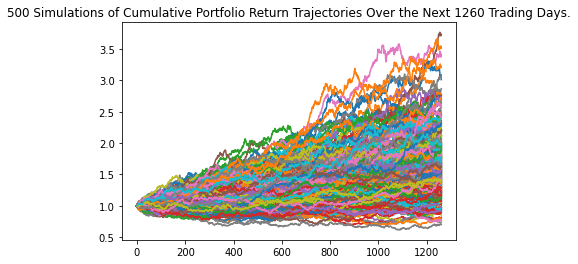

In [49]:
# Plot simulation outcomes
line_plot_retire5 = mcs_retire5.plot_simulation()

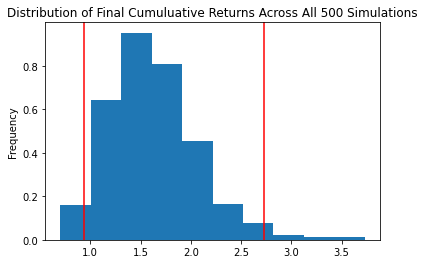

In [50]:
# Plot probability distribution and confidence intervals
dist_plot_retire5 = mcs_retire5.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_retire5 = mcs_retire5.summarize_cumulative_return()

# Print summary statistics
print(tbl_retire5)

count           500.000000
mean              1.629147
std               0.441982
min               0.702557
25%               1.314966
50%               1.578851
75%               1.875452
max               3.729416
95% CI Lower      0.935529
95% CI Upper      2.732342
Name: 1260, dtype: float64


In [52]:
# Set initial investment
initial_investment_5yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stock_retire5_lower = round(tbl_retire5[8]*initial_investment_5yr,2)
stock_retire5_upper = round(tbl_retire5[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${stock_retire5_lower} and ${stock_retire5_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56131.71 and $163940.52


### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with more aggresive portfolio (60/40)
mcs_retire10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

mcs_retire10.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.66  111.770  2581009   
2016-06-20 00:00:00-04:00  111.57  111.5800  111.45  111.460  1877171   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2016-06-14 00:00:00-04:00          NaN  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
2016-06-16 00:00:00-04:00     0.000537  206.73  208.57  205.5900  208.42   
2016-06-17 00:00:00-04:00    -0.000805  207.17  207.20  205.7500  206.58   
2016-06-20 00:00:00-04:00    -0.002774  208.82  209.61  207.7500  207.86   

                                                   
                              volume daily_return  
time                                               
2016-06-14 00:00:00-04:00  102129228          NaN  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
2016-06-16 00:00:00-04:00  111547742     0.003225  
2016-06-17 00:00:00-04:00   86657818    -0.008828  
2016-06-20 00:00:00-04:00   67866194     0.006196

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_retire10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993060,0.997166,1.000714,0.996660,0.996072,0.999497,1.001180,0.992754,1.001470,0.999297,...,0.997442,0.997589,1.002925,0.998456,1.010094,1.003246,1.001267,1.002126,1.005152,0.997913
2,0.996911,1.006095,1.000857,0.996511,0.990789,1.001047,1.006114,0.997154,1.001031,1.007583,...,1.001231,0.994779,1.004277,0.989031,1.001804,1.002084,1.006894,1.001103,1.001544,1.000901
3,0.999659,1.003552,1.003335,1.003812,0.989017,1.003203,1.010383,0.995549,1.003356,1.014092,...,1.000378,1.003414,1.009425,0.989161,1.002933,1.009907,1.006049,0.996479,1.001463,1.000461
4,1.002616,0.995677,1.005974,1.002828,0.986141,1.009748,1.003509,0.998911,1.003670,1.012625,...,1.002533,0.999707,1.015528,0.982914,1.002786,1.006102,1.008704,0.998914,1.001739,1.008467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.502227,1.738753,2.036864,1.919872,3.272206,2.541127,1.963268,1.844334,1.883906,1.852057,...,1.344461,1.664189,1.709535,1.573978,1.938893,2.094267,2.182648,1.514453,1.679804,1.504896
2517,2.540492,1.731700,2.039231,1.924871,3.262110,2.547805,1.988019,1.845465,1.884314,1.863774,...,1.359193,1.660617,1.709431,1.580343,1.942165,2.103247,2.185787,1.522490,1.675655,1.496366
2518,2.537162,1.719136,2.025860,1.908485,3.295188,2.541350,1.997482,1.848624,1.895708,1.861448,...,1.363710,1.674221,1.702401,1.581475,1.944812,2.097748,2.189140,1.523732,1.684180,1.490252
2519,2.544262,1.715191,2.035034,1.901292,3.283869,2.548014,2.004305,1.842930,1.895946,1.871928,...,1.363247,1.675259,1.698877,1.583370,1.950965,2.111161,2.187829,1.523446,1.692542,1.495662


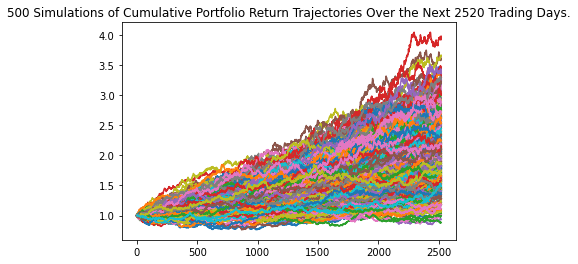

In [55]:
# Plot simulation outcomes
line_plot_retire10 = mcs_retire10.plot_simulation()

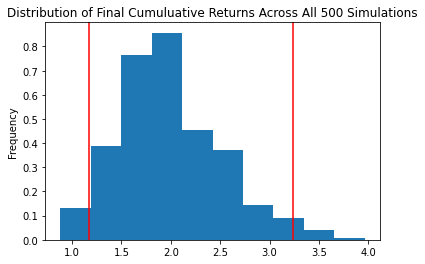

In [56]:
# Plot probability distribution and confidence intervals
dist_plot_retire10 = mcs_retire10.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_retire10 = mcs_retire10.summarize_cumulative_return()

# Print summary statistics
print(tbl_retire10)

count           500.000000
mean              1.993553
std               0.514757
min               0.882035
25%               1.647100
50%               1.929782
75%               2.267457
max               3.962387
95% CI Lower      1.172406
95% CI Upper      3.233160
Name: 2520, dtype: float64


In [58]:
# Set initial investment
initial_investment_10yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
stock_retire10_lower = round(tbl_retire10[8]*initial_investment_10yr,2)
stock_retire10_upper = round(tbl_retire10[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${stock_retire10_lower} and ${stock_retire10_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70344.39 and $193989.59
